In [ ]:
import pandas as pd
import numpy as np

# Panel은 3차원을 다루는 자료구조이다.
# item 면, major_axis 행, minor_axis 열
data = {
    'Item1' : pd.DataFrame(np.random.randn(4, 3)),
    'Item2' : pd.DataFrame(np.random.randn(4, 2)),
    'Item3' : pd.DataFrame(np.random.randn(4, 1))
}

p = pd.Panel(data)
print(data['Item1'])
print()
print(type(data), type(p))
print()
print(p['Item1'])
print(p['Item2'])
print(p['Item3'])

In [ ]:
print(p.major_xs(0))
print()
print(p.minor_xs(1))

In [ ]:
p['Item2'][1][1] = None
p.iloc[1,1,1] = 0
print(p['Item2'])

In [ ]:
frame = pd.DataFrame(np.arange(12).reshape((4,3)), \
                     index = [['a','a','b','b'], [1,2,1,2]],\
                     columns = [['Ohio', 'Ohio','Colorado'],['Green','Red','Green']])
print(frame)
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']


In [ ]:
print(frame['Ohio'])

In [ ]:
frame.swaplevel(0,1).sort_index(0)

In [ ]:
frame

In [ ]:
frame = pd.DataFrame({'a':range(7), 'b':range(7,0,-1),
                     'c':['one', 'one','one','two', 'two','two','two'],
                     'd':[0,1,2,0,1,2,3]})
print(frame, end = '\n\n')
frame2 = frame.set_index(['c','d'])
print(frame2, end = '\n\n')
print(frame2.reset_index)
frame_reindex = frame.reindex(index=[0,2,5], columns=['a','d'])
frame_reindex.describe()

In [ ]:
import pymysql
import numpy

conn = pymysql.connect(host="192.168.0.164", port=3306, user="root", passwd="gksrlgns1", db="acorn", charset="utf8mb4",\
                       cursorclass=pymysql.cursors.DictCursor)
cursor = conn.cursor()
a = cursor.execute("select * from sungjuk")
rez = cursor.fetchall()
df = pd.DataFrame(rez)
df.describe()
print(df.dtypes)


In [ ]:
# 문제 :  국어 영어 수학 점수만 골라내서 과목별 합계와 최대값을 출력
df_numeric = df[['eng', 'kor','mat']]
df_numeric.apply([sum,max])
df.head()

In [ ]:
#성별필드sex를 생성하고 성별필드를 중심으로 한 pivot_table을 생성한 후 그 합계를 출력하시오.
df_numeric["sex"] = np.random.randint(0,2,len(df))
print(df_numeric)

#행렬로 데이터 재구성
pd.pivot_table(df_numeric, index=['sex'],
              values=['kor','mat','eng'], aggfunc=[np.sum, np.max],
              fill_value=0)

#축만 변경
frame2 = df_numeric.set_index(['sex'])
print(frame2.sort_index(0))

In [ ]:
from bs4 import BeautifulSoup
import urllib3

http = urllib3.PoolManager()
movieListUrl = "http://www.kobis.or.kr/kobisopenapi/webservice/rest/movie/searchMovieList.json?key=430156241533f1d058c603178cc3ca0e&openStartDt=2016&itemPerPage=20"
response = http.request('GET', movieListUrl)
movieIdData = BeautifulSoup(response.data, "html.parser")

print(type(movieIdData))

In [ ]:
import json
print(movieIdData)
#movieIdData = json.loads(str(movieIdData))
movieIdData["movieListResult"]
print(movieIdData["movieListResult"]['totCnt'])
print(len(movieIdData["movieListResult"]["movieList"]))

In [ ]:
movieIDDF = pd.DataFrame()
movieIDDF = movieIDDF.append({"movieCd":"","movieNm":"","movieNmEn":"","openDt":"", "directorpeopleNm":""}, ignore_index=True)
num = len(movieIdData["movieListResult"]["movieList"])
for i in range(0, num):
    movieIDDF.loc[i,"movieCd"] = movieIdData["movieListResult"]["movieList"][i]["movieCd"]
    movieIDDF.loc[i,"movieNm"] = movieIdData["movieListResult"]["movieList"][i]["movieNm"]
    movieIDDF.loc[i,"movieNmEn"] = movieIdData["movieListResult"]["movieList"][i]["movieNmEn"]
    movieIDDF.loc[i,"openDt"] = movieIdData["movieListResult"]["movieList"][i]["openDt"]
    movieIDDF.loc[i,"directorpeopleNm"] = movieIdData["movieListResult"]["movieList"][i]["directors"][0]["peopleNm"]
    
movieIDDF
movieIDDF["year"] = movieIDDF["openDt"].apply(lambda x: str(x)[:4])
movieIDDF["month"] = movieIDDF["openDt"].apply(lambda x: str(x)[4:6])
movieIDDF["day"] = movieIDDF["openDt"].apply(lambda x: str(x)[6:])

print(movieIDDF)

In [2]:
import pandas as pd
import numpy as np
df = pd.DataFrame({"A":['일반', '일반', '특수', '예외'] * 6,
                  "B":['서울','대구','부산']*8,
                  "C":['건조','건조','건조','우기','우기','우기']*4,
                  "D":np.random.randn(24),
                  "E":np.random.randn(24)})
print(df)
pd.crosstab(df.A, df.B)

     A   B   C         D         E
0   일반  서울  건조  1.639603  1.067398
1   일반  대구  건조  0.899543  0.881165
2   특수  부산  건조  2.227933  0.145587
3   예외  서울  우기 -1.381313  0.211283
4   일반  대구  우기 -0.491523 -0.523276
5   일반  부산  우기  0.766509 -0.193277
6   특수  서울  건조 -2.864838  0.966086
7   예외  대구  건조 -0.454206 -0.927400
8   일반  부산  건조 -0.089863  1.692646
9   일반  서울  우기  0.068289  1.387298
10  특수  대구  우기 -0.786248 -0.591151
11  예외  부산  우기 -0.044740  1.315647
12  일반  서울  건조 -0.601893 -0.759090
13  일반  대구  건조  0.654757 -0.379187
14  특수  부산  건조 -0.126376  0.826837
15  예외  서울  우기 -0.290514 -0.284734
16  일반  대구  우기 -1.747048  0.267520
17  일반  부산  우기  0.373452  0.545379
18  특수  서울  건조  0.332056 -0.918944
19  예외  대구  건조 -0.501612 -1.542263
20  일반  부산  건조  1.399615  0.466865
21  일반  서울  우기  0.787323  0.466677
22  특수  대구  우기  0.765386 -0.974680
23  예외  부산  우기 -0.743804  0.301567


B,대구,부산,서울
A,,,
예외,2,2,2
일반,4,4,4
특수,2,2,2


In [3]:
# clarity와 price간의 crosstab을 생성하시오
# bar plot
# price와 clarity boxplot
# cut과 clarity 데이터로 군집화하고 그 size를 확인하시오
# clarity와 color간의 crosstab을 생성 barplot

import matplotlib.pyplot as plt

df = pd.read_csv("diamond.csv")
df = pd.DataFrame(df)
ct = pd.crosstab(df.clarity, df.price)
print(ct)

price    326.0    327.0    334.0    335.0    336.0    337.0    338.0    \
clarity                                                                  
I1             0        0        0        0        0        0        0   
IF             0        0        0        0        0        0        0   
SI1            1        0        0        0        0        1        0   
SI2            1        0        0        1        0        0        0   
VS1            0        1        0        0        0        0        1   
VS2            0        0        1        0        0        1        0   
VVS1           0        0        0        0        1        0        0   
VVS2           0        0        0        0        1        0        0   

price    339.0    340.0    342.0     ...     18787.0  18788.0  18791.0  \
clarity                              ...                                 
I1             0        0        0   ...           0        0        0   
IF             0        0        0   

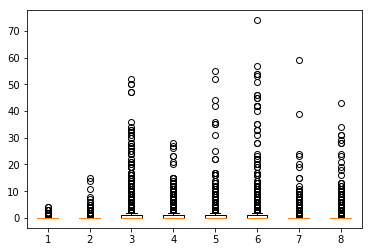

In [10]:
plt.boxplot(ct)
plt.show()

In [38]:
# sales 데이터를 로딩하고 처리하시오
# 1) Customer Number를 int형으로 처리
# 2) df['Jan Units']를 int형으로 처리
# 3) '2016'데이터를 float형으로 처리

df = pd.read_csv('sales.csv', dtype={
    'Customer Number' : 'int'.
    converters = {'2016':covert_currency,
                 '2017':convert_currency.
                 'Percent Growth':convert_percent,
                 ...
                 'Active':lambda x:np.where(x=='Y', True, False)}
})
df = pd.DataFrame(df)
df['Customer Number'] = df['Customer Number'].astype('int')

print(df.dtypes)

def convert_currency(val):
    new_val = val.replace(',','').replace("$", '')
    return float(new_val)
def convert_percent(val):
    new_val = val.replace('%','')
    return float(new_val)/100

Customer Number     int32
Customer Name      object
2016               object
2017               object
Percent Growth     object
Jan Units          object
Month               int64
Day                 int64
Year                int64
Active             object
dtype: object


In [36]:
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,"$125,000.00",$162500.00,30.00%,500,1,10,2015,Y
1,552278,Smith Plumbing,"$920,000.00","$101,2000.00",10.00%,700,6,15,2014,Y
2,23477,ACME Industrial,"$50,000.00",$62500.00,25.00%,125,3,29,2016,Y
3,24900,Brekke LTD,"$350,000.00",$490000.00,4.00%,75,10,27,2015,Y
4,651029,Harbor Co,"$15,000.00",$12750.00,-15.00%,Closed,2,2,2014,N


In [ ]:
# fire_station 데이터를 로딩하고 다음 문제를 해결하시오 - 숙제
# 종합문제)
# 문제1 ) 불평의 종류(중복되지 않는) 와 불평의 종류별 개수를 출력하시오
# 문제2 ) 불평의 상위 10개를 출력하시오
# 문제3 ) 불평의 상위 10개를 bar형태로 출력하시오
# 문제4 ) 거주지별 불평의 갯수를 확인하시오
# 문제5 ) 불평의 종류별로 카운트 하시오
# 문제6 ) 불평의 종류별로 카운트한 내용을 kde로 출력하시오
# 문제7 ) 소음 불평이 많은 지역을 확인하시오
# 문제8 ) 거주지별로 불평의 개수를 카운트 하시오
# 문제9 ) 소음불평이 전체 불평에서 차지하는 비율을 출력하시오 

In [50]:
# 문제 2
print(fire.head(10))

   Unique Key            Created Date             Closed Date Agency  \
0    26589651  10/31/2013 02:08:41 AM                     NaN   NYPD   
1    26593698  10/31/2013 02:01:04 AM                     NaN   NYPD   
2    26594139  10/31/2013 02:00:24 AM  10/31/2013 02:40:32 AM   NYPD   
3    26595721  10/31/2013 01:56:23 AM  10/31/2013 02:21:48 AM   NYPD   
4    26590930  10/31/2013 01:53:44 AM                     NaN  DOHMH   
5    26592370  10/31/2013 01:46:52 AM                     NaN   NYPD   
6    26595682  10/31/2013 01:46:40 AM                     NaN   NYPD   
7    26595195  10/31/2013 01:44:19 AM  10/31/2013 01:58:49 AM   NYPD   
8    26590540  10/31/2013 01:44:14 AM  10/31/2013 02:28:04 AM   NYPD   
9    26594392  10/31/2013 01:34:41 AM  10/31/2013 02:23:51 AM   NYPD   

                               Agency Name           Complaint Type  \
0          New York City Police Department  Noise - Street/Sidewalk   
1          New York City Police Department          Illegal Parki

In [51]:
print(fire.columns)

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina